# **Infosys Springboard Internship 5.0 : GrocerGenius Task 1**
#### **Assignee** : RAMESWAR BISOYI   

In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv(r"C:\Users\RAMESWAR BISOYI\Downloads\Train.csv")

train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# 1. **Imputation of Missing Data:**
   - Detect and address incomplete entries by employing appropriate imputation techniques. Consider grouping relevant features to derive meaningful values for imputation. Explore strategies beyond mean or median, such as predictive imputation or domain-driven grouping.

In [3]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [4]:
# Grouped median imputation for Item_Weight
train_data['Item_Weight'] = train_data.groupby('Item_Type')['Item_Weight'].transform(lambda x: x.fillna(x.median()))

# Grouped mode imputation for Outlet_Size
train_data['Outlet_Size'] = train_data.groupby(['Outlet_Type'])['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0]))

# Check remaining missing values
print(train_data.isnull().sum())
train_data.head()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Observations:

### Item_Weight Imputation:
- **Grouped Median Imputation** (by `Item_Type`): This method fills missing values with the median weight of each item type, making it context-aware and robust against outliers.
  - **Advantages**: It reflects variations in item weight based on type, leading to more accurate imputations.
  
- **Global Mean Imputation**: This simpler method fills missing values with the overall mean weight across all items.
  - **Disadvantages**: It ignores the relationships between `Item_Weight` and other features, which can result in inaccuracies.

**Conclusion**: **Grouped Median Imputation** is superior to **Global Mean Imputation** for `Item_Weight` due to its contextual sensitivity and accuracy.

### Outlet_Size Imputation:
- **Grouped Mode Imputation** (by `Outlet_Type`): This method fills missing outlet sizes using the mode within each defined group, enhancing accuracy by capturing relevant relationships.
  
- **Global Mode Imputation**: This straightforward method fills missing values with the most frequent value across the dataset.
  - **Disadvantages**: It overlooks the relationships with outlet types and locations, leading to potentially inaccurate results.

**Conclusion**: **Grouped Mode Imputation** is preferable over **Global Mode Imputation** for `Outlet_Size`, as it provides a more accurate reflection of outlet characteristics.

Overall, grouped imputation techniques are favored for both `Item_Weight` and `Outlet_Size` due to their ability to leverage data structure for better accuracy.


## **EDA(Exploratory Data Analysis) Tasks :**

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

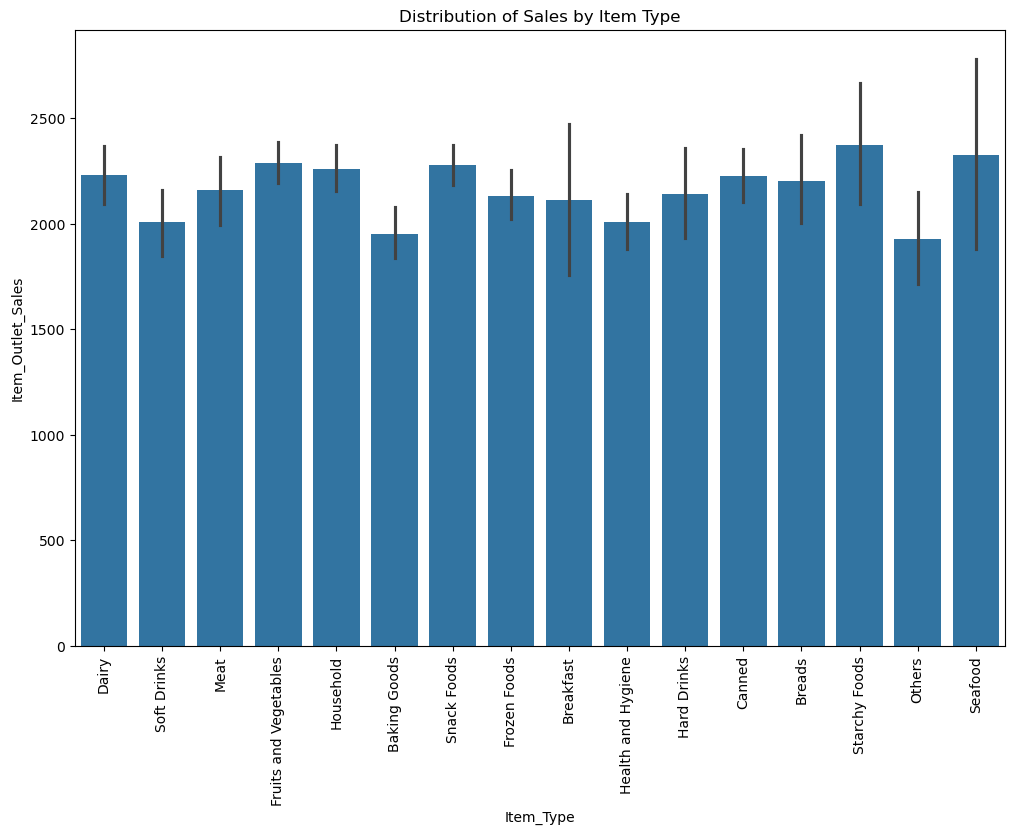

In [15]:
plt.figure(figsize=(12,8))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=train_data)
plt.xticks(rotation=90)
plt.title('Distribution of Sales by Item Type')
plt.show()

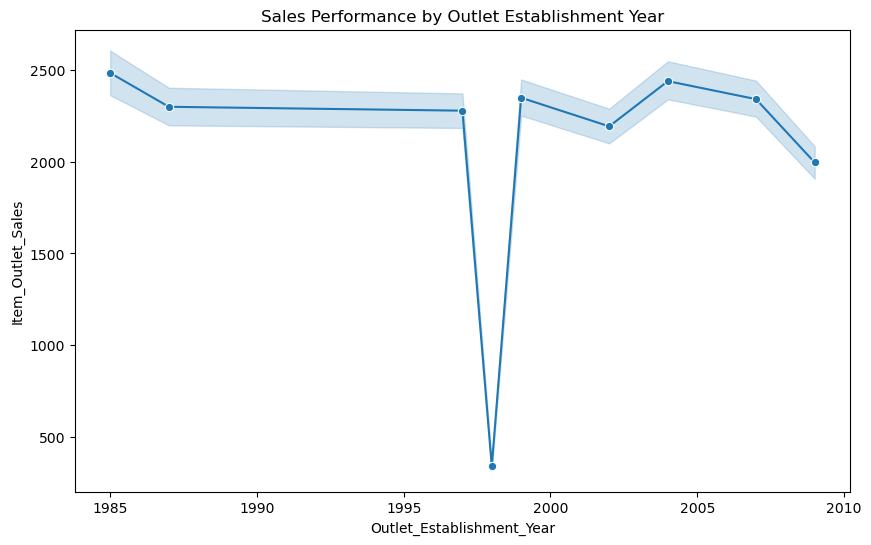

In [16]:
# Line plot for Outlet Age vs Sales
plt.figure(figsize=(10,6))
sns.lineplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=train_data, marker='o')
plt.title('Sales Performance by Outlet Establishment Year')
plt.show()

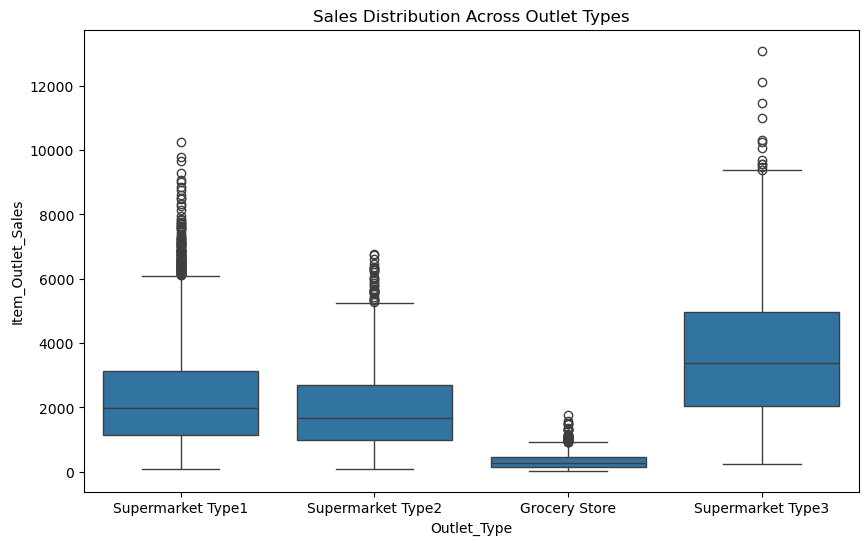

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train_data)
plt.title('Sales Distribution Across Outlet Types')
plt.show()

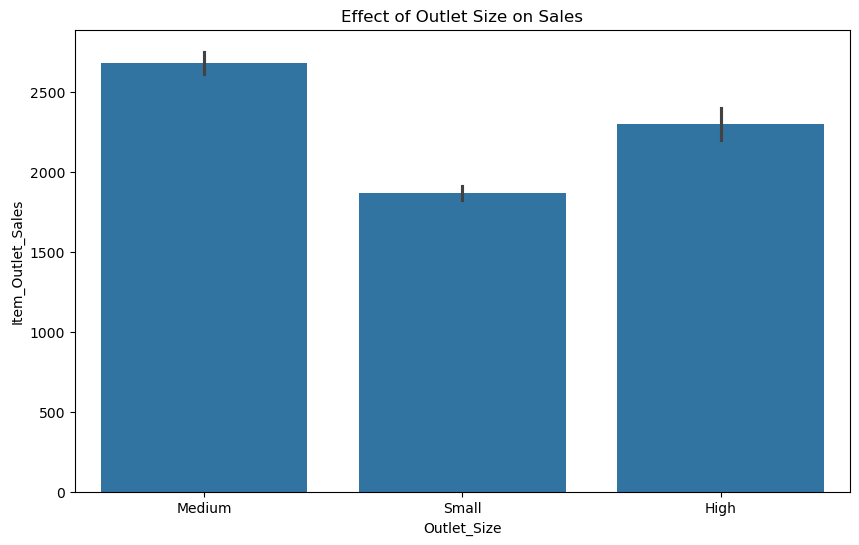

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=train_data)
plt.title('Effect of Outlet Size on Sales')
plt.show()

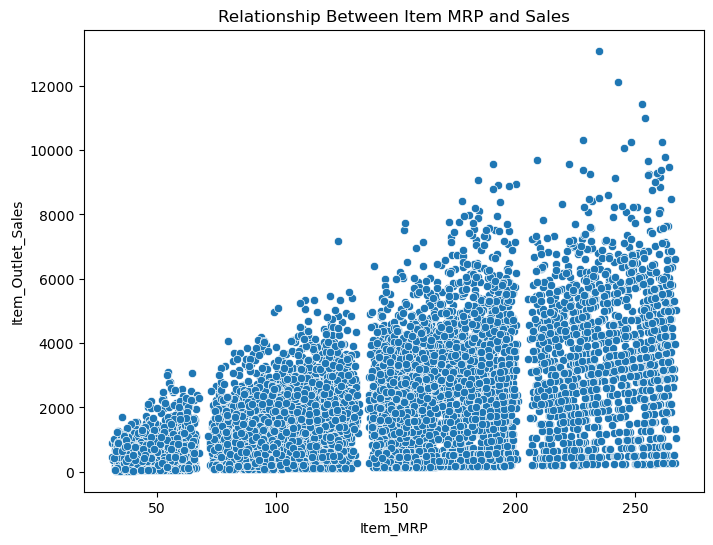

In [19]:
# Scatter plot for Item MRP vs Sales
plt.figure(figsize=(8,6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=train_data)
plt.title('Relationship Between Item MRP and Sales')
plt.show()


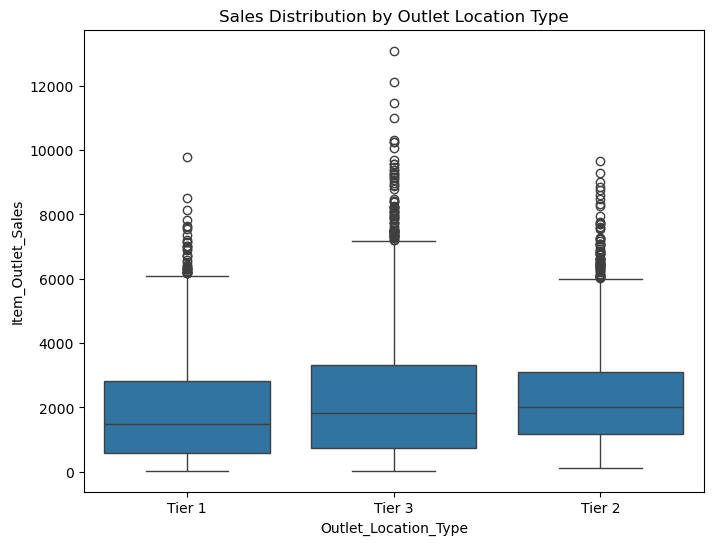

In [20]:
# Box plot for Outlet Location Type vs Sales
plt.figure(figsize=(8,6))
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=train_data)
plt.title('Sales Distribution by Outlet Location Type')
plt.show()


# **Advanced EDA Tasks :**

<Figure size 1000x600 with 0 Axes>

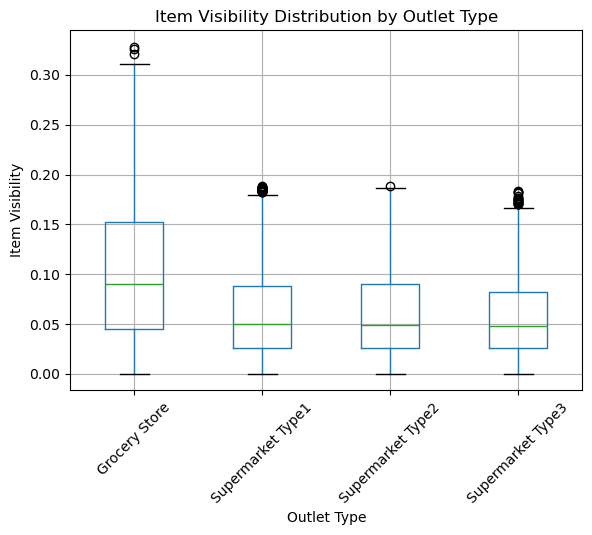

In [23]:
plt.figure(figsize=(10, 6))
train_data.boxplot(column='Item_Visibility', by='Outlet_Type')
plt.title('Item Visibility Distribution by Outlet Type')
plt.suptitle('')  # Suppress default title
plt.xlabel('Outlet Type')
plt.ylabel('Item Visibility')
plt.xticks(rotation=45)
plt.show()


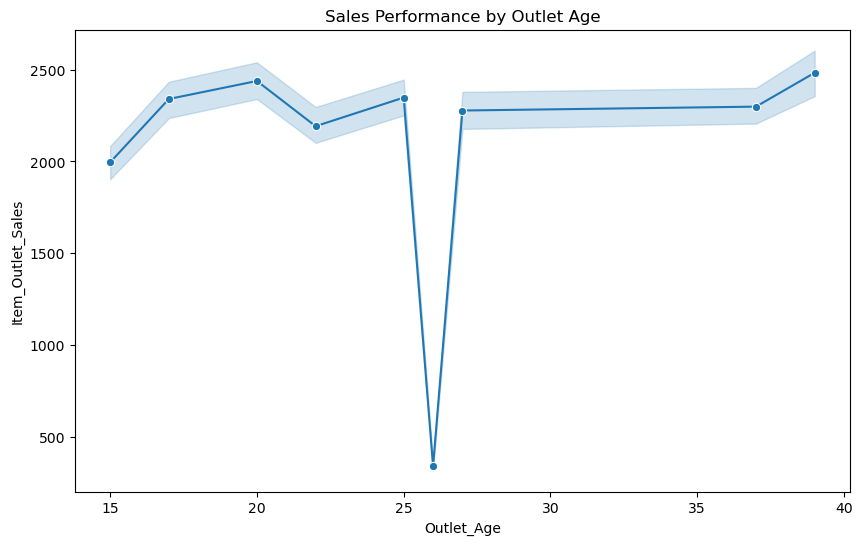

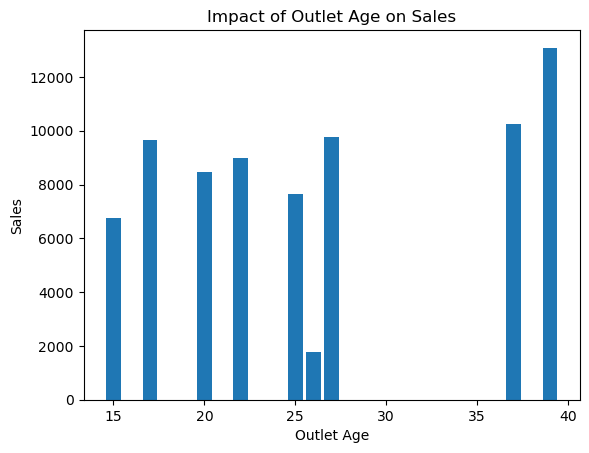

In [24]:
# Create a new column for outlet age
train_data['Outlet_Age'] = 2024 - train_data['Outlet_Establishment_Year']
plt.figure(figsize=(10, 6))
sns.lineplot(x='Outlet_Age', y='Item_Outlet_Sales', data=train_data, marker='o')
plt.title('Sales Performance by Outlet Age')
plt.show()

plt.bar(train_data['Outlet_Age'], train_data['Item_Outlet_Sales'])
plt.title('Impact of Outlet Age on Sales')
plt.xlabel('Outlet Age')
plt.ylabel('Sales')
plt.show()

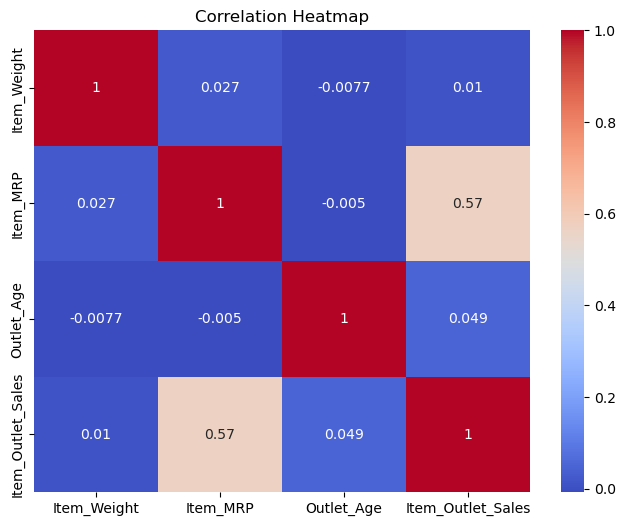

In [25]:
plt.figure(figsize=(8, 6))
correlation_matrix = train_data[['Item_Weight', 'Item_MRP', 'Outlet_Age', 'Item_Outlet_Sales']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

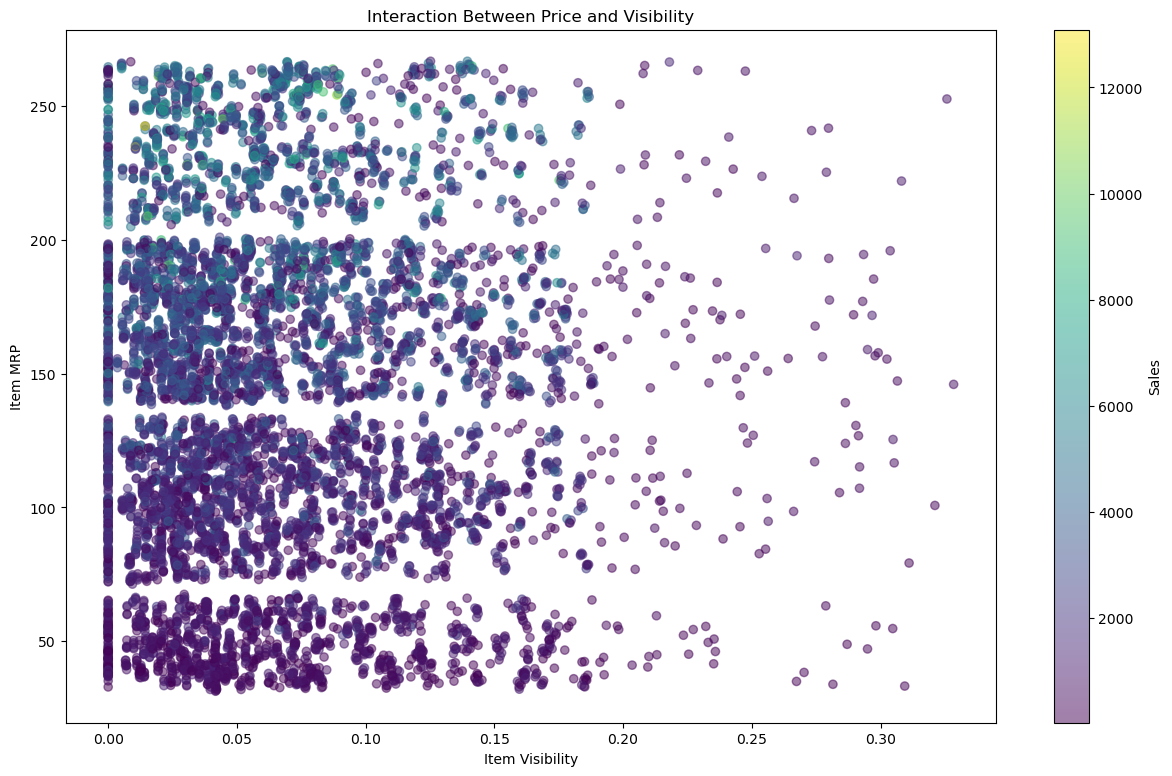

In [26]:
plt.figure(figsize=(15, 9))
plt.scatter(train_data['Item_Visibility'], train_data['Item_MRP'], alpha=0.5, c=train_data['Item_Outlet_Sales'])
plt.colorbar(label='Sales')
plt.title('Interaction Between Price and Visibility')
plt.xlabel('Item Visibility')
plt.ylabel('Item MRP')
plt.show()


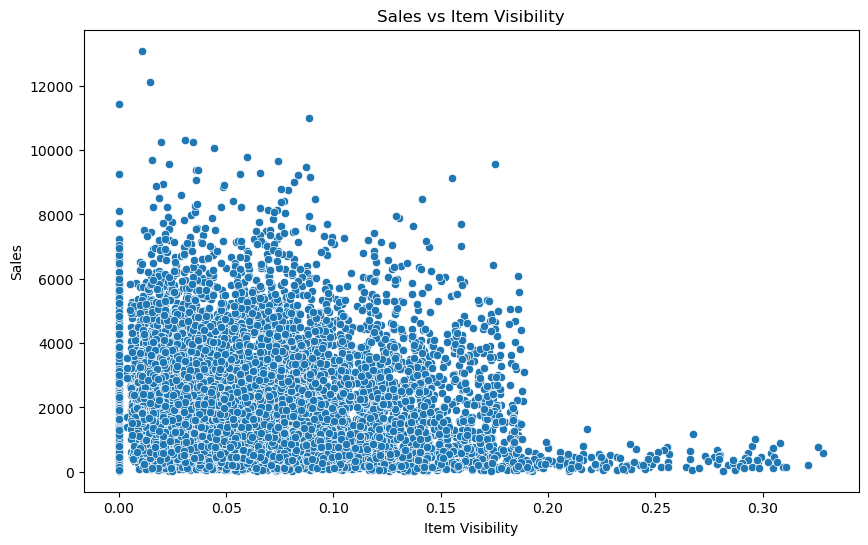

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=train_data)
plt.title('Sales vs Item Visibility')
plt.xlabel('Item Visibility')
plt.ylabel('Sales')
plt.show()


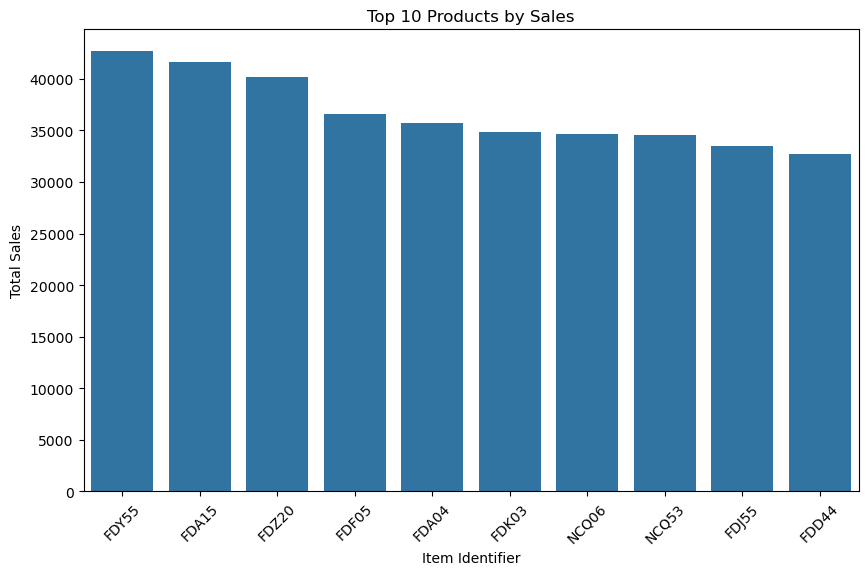

In [29]:
top_products = train_data.groupby('Item_Identifier')['Item_Outlet_Sales'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Item_Identifier', y='Item_Outlet_Sales', data=top_products)
plt.title('Top 10 Products by Sales')
plt.xlabel('Item Identifier')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


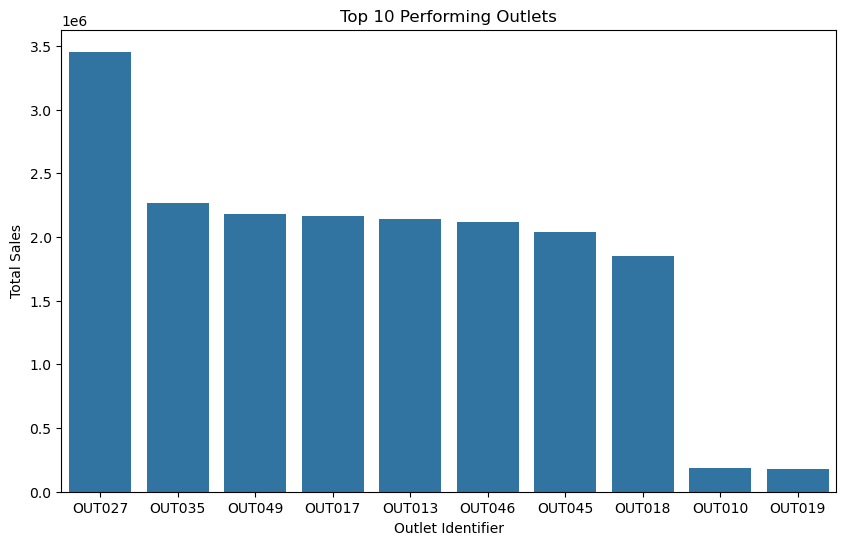

In [30]:
top_outlets = train_data.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=top_outlets)
plt.title('Top 10 Performing Outlets')
plt.xlabel('Outlet Identifier')
plt.ylabel('Total Sales')
plt.show()


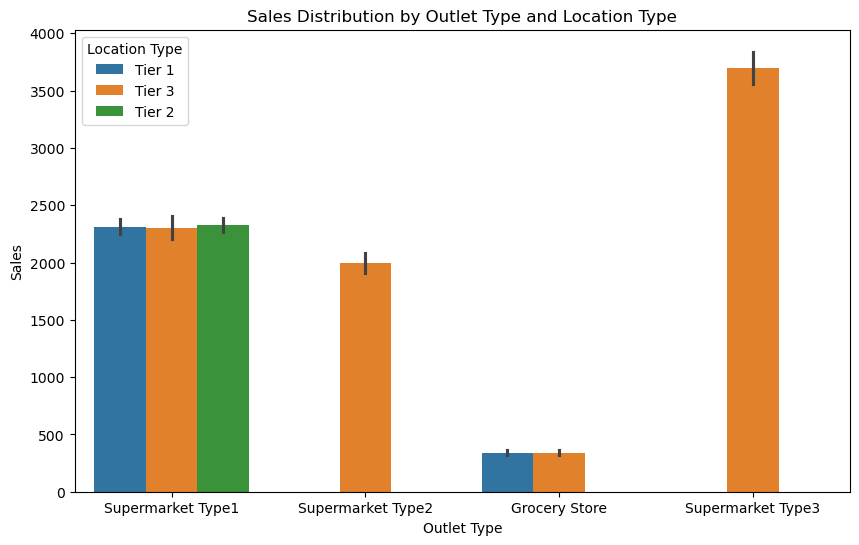

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Location_Type', data=train_data)
plt.title('Sales Distribution by Outlet Type and Location Type')
plt.xlabel('Outlet Type')
plt.ylabel('Sales')
plt.legend(title='Location Type')
plt.show()

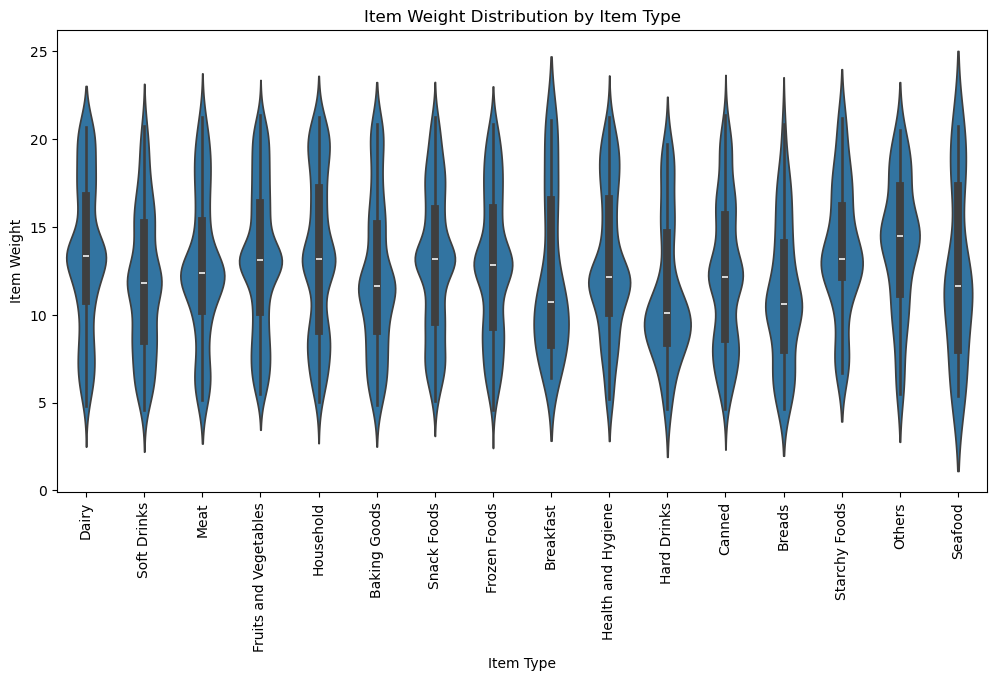

In [33]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Item_Type', y='Item_Weight', data=train_data)
plt.xticks(rotation=90)
plt.title('Item Weight Distribution by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Item Weight')
plt.show()

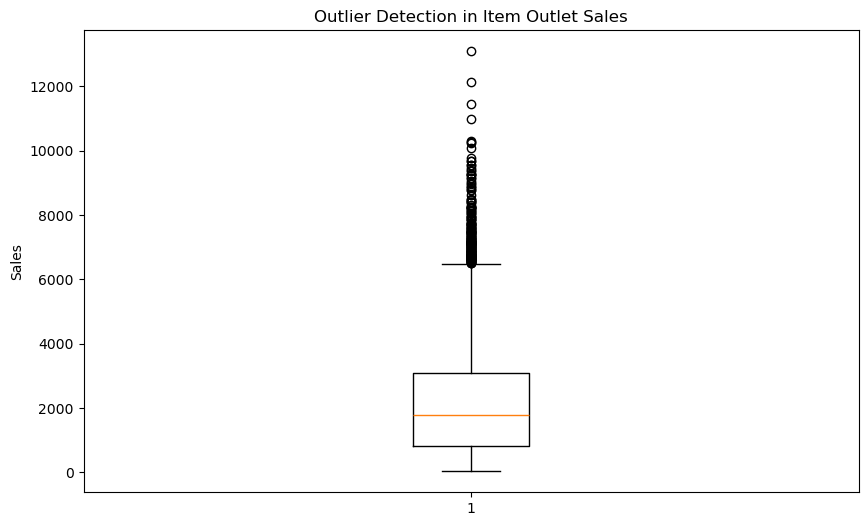

In [35]:
plt.figure(figsize=(10, 6))
plt.boxplot(train_data['Item_Outlet_Sales'])
plt.title('Outlier Detection in Item Outlet Sales')
plt.ylabel('Sales')
plt.show()

# 2. **Categorical Variable Encoding:**
   - Convert categorical features into a suitable format for machine learning models. Implement appropriate encoding methods, such as ordinal or nominal encoding, depending on the feature type. When dealing with hierarchical categories, ensure the encoded values respect the intrinsic ordering.

In [38]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
import pandas as pd

In [39]:
zero_count = (train_data['Item_Visibility'] == 0).sum()
print("Number of zero values:", zero_count)

mean_visibility = train_data['Item_Visibility'].mean()
train_data['Item_Visibility'] = train_data['Item_Visibility'].replace(0, mean_visibility)
print(train_data['Item_Visibility'].head())

zero_count = (train_data['Item_Visibility'] == 0).sum()
print("Number of zero values:", zero_count)

Number of zero values: 526
0    0.016047
1    0.019278
2    0.016760
3    0.066132
4    0.066132
Name: Item_Visibility, dtype: float64
Number of zero values: 0


In [41]:
# Creating a copy of the dataframe to apply transformations
df = train_data.copy()
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,25
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,26
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,37


#### Standardizing 'Item_Fat_Content' column values

In [45]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})

In [46]:
outlet_size=['Small','Medium','High']
outlet_location_type=['Tier 1','Tier 2','Tier 3']
item_fat_content=['Low Fat','Regular']

In [47]:
ohe = OneHotEncoder(sparse_output=False)
ode = OrdinalEncoder(categories = [outlet_size,outlet_location_type,item_fat_content])

In [48]:
from sklearn.compose import make_column_transformer 

In [49]:
# Function to categorize the outlet establishment year
def categorize_outlet_year(year):
    if year >= 2010:  # Newer
        return 'Latest'
    elif 2000 <= year < 2010:  # Mid-range
        return 'New'
    else:  # Older
        return 'Old'

# Apply the categorization function to create a new column
df['Outlet_Age_Category'] = df['Outlet_Establishment_Year'].apply(categorize_outlet_year)

# Display the original establishment year and the new category
output = df[['Outlet_Establishment_Year', 'Outlet_Age_Category']]
print(output.head())  # Display the first few rows of the output

   Outlet_Establishment_Year Outlet_Age_Category
0                       1999                 Old
1                       2009                 New
2                       1999                 Old
3                       1998                 Old
4                       1987                 Old


In [50]:
ct=make_column_transformer(
    (ohe,['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Outlet_Age_Category']),
    (ode,['Outlet_Size','Outlet_Location_Type','Item_Fat_Content']),
    remainder = 'passthrough')

ct.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(sparse_output=False),
                                 ['Item_Identifier', 'Item_Type',
                                  'Outlet_Identifier', 'Outlet_Type',
                                  'Outlet_Age_Category']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[['Small', 'Medium',
                                                             'High'],
                                                            ['Tier 1', 'Tier 2',
                                                             'Tier 3'],
                                                            ['Low Fat',
                                                             'Regular']]),
                                 ['Outlet_Size', 'Outlet_Location_Type',
                                  'Item_Fat_Content'])])

In [51]:
df_encoded = ct.fit_transform(df)

In [52]:
df_encoded.head()

,onehotencoder__Item_Identifier_DRA12,onehotencoder__Item_Identifier_DRA24,onehotencoder__Item_Identifier_DRA59,onehotencoder__Item_Identifier_DRB01,onehotencoder__Item_Identifier_DRB13,onehotencoder__Item_Identifier_DRB24,onehotencoder__Item_Identifier_DRB25,onehotencoder__Item_Identifier_DRB48,onehotencoder__Item_Identifier_DRC01,onehotencoder__Item_Identifier_DRC12,...,onehotencoder__Outlet_Age_Category_Old,ordinalencoder__Outlet_Size,ordinalencoder__Outlet_Location_Type,ordinalencoder__Item_Fat_Content,remainder__Item_Weight,remainder__Item_Visibility,remainder__Item_MRP,remainder__Outlet_Establishment_Year,remainder__Item_Outlet_Sales,remainder__Outlet_Age
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,9.30,0.016047,249.8092,1999,3735.1380,25
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,2.0,1.0,5.92,0.019278,48.2692,2009,443.4228,15
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,17.50,0.016760,141.6180,1999,2097.2700,25
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,1.0,19.20,0.066132,182.0950,1998,732.3800,26
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,2.0,0.0,8.93,0.066132,53.8614,1987,994.7052,37


# 3. **Feature Derivation:**
   - Engineer new features to enhance the model's learning capacity. Leverage domain knowledge to construct features such as temporal transformations or ratios between variables that might carry predictive power.

#### **1. Item-Related Features**:
- **Item Weight to MRP Ratio** : The ratio between Item_Weight and Item_MRP might indicate the value-for-money aspect, which could affect sales.
- **Visibility Rank** : Items with higher visibility in the store might sell more. We can create a rank or percentile based on Item_Visibility.

In [55]:
df_encoded['Weight_to_MRP_Ratio'] = df_encoded['remainder__Item_Weight'] / df_encoded['remainder__Item_MRP']

df_encoded['Visibility_Rank'] = df_encoded['remainder__Item_Visibility'].rank(ascending=False)

#### **2. Outlet-Related Features**:
- **Outlet Age**: You already have the outlet's age, but you can create Outlet Age Categories like "New", "Mature", and "Old" based on the numerical values.
- **Outlet Sales-to-Age Ratio**: The ratio of Item_Outlet_Sales to the age of the outlet might indicate how well a store is performing relative to its age.

In [57]:
# Assuming there is an 'Outlet_Establishment_Year' column
df_encoded['remainder__Outlet_Age'] = 2024 - df_encoded['remainder__Outlet_Establishment_Year'] 

# Define bins and labels for Outlet Age categorization
bins = [0, 10, 20, 30, 100]
labels = ['New', 'Middle-aged', 'Old', 'Very Old']

# Apply pd.cut to categorize the outlet age based on the bins and labels
df_encoded['Outlet_Age_Category'] = pd.cut(df_encoded['remainder__Outlet_Age'], bins=bins, labels=labels)

# Feature: Sales to Age Ratio
df_encoded['Sales_to_Age_Ratio'] = df_encoded['remainder__Item_Outlet_Sales'] / df_encoded['remainder__Outlet_Age']


#### **3. Creating a Yearly Sales Trend Feature**:
- For Yearly Sales Trend, you can calculate the mean sales for each year and see how sales are trending over time.3

In [59]:
# Calculate yearly sales for each outlet
df_encoded['Yearly_Sales_Trend'] = df_encoded.groupby('remainder__Outlet_Establishment_Year')['remainder__Item_Outlet_Sales'].transform('mean')

In [60]:
# Create Sales to Age Ratio
df_encoded['Sales_to_Age_Ratio'] = df_encoded['remainder__Item_Outlet_Sales'] / df_encoded['remainder__Outlet_Age']

#### **5. Item Popularity**:
- **Item Sales Rank**: Rank items by sales to capture the most popular or least popular items.

In [62]:
df_encoded['Item_Sales_Rank'] = df_encoded['remainder__Item_Outlet_Sales'].rank(ascending=False)

In [63]:
df_encoded.head()

,onehotencoder__Item_Identifier_DRA12,onehotencoder__Item_Identifier_DRA24,onehotencoder__Item_Identifier_DRA59,onehotencoder__Item_Identifier_DRB01,onehotencoder__Item_Identifier_DRB13,onehotencoder__Item_Identifier_DRB24,onehotencoder__Item_Identifier_DRB25,onehotencoder__Item_Identifier_DRB48,onehotencoder__Item_Identifier_DRC01,onehotencoder__Item_Identifier_DRC12,...,remainder__Item_MRP,remainder__Outlet_Establishment_Year,remainder__Item_Outlet_Sales,remainder__Outlet_Age,Weight_to_MRP_Ratio,Visibility_Rank,Outlet_Age_Category,Sales_to_Age_Ratio,Yearly_Sales_Trend,Item_Sales_Rank
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,249.8092,1999,3735.1380,25,0.037228,7856.0,Old,149.405520,2348.354635,1447.5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,48.2692,2009,443.4228,15,0.122645,7640.0,Middle-aged,29.561520,1995.498739,7420.5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,141.6180,1999,2097.2700,25,0.123572,7805.0,Old,83.890800,2348.354635,3674.5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,182.0950,1998,732.3800,26,0.105439,3788.5,Old,28.168462,339.351662,6655.5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,53.8614,1987,994.7052,37,0.165796,3788.5,Very Old,26.883924,2298.995256,6033.0


# 4. **Outlier Treatment:**
   - Apply robust techniques to detect and handle outliers in continuous variables. Use statistical methods like IQR or Z-score to flag anomalies, and explore different approaches, such as capping or removal, to mitigate their impact on model performance.

## IQR Outlier Handling

The Interquartile Range (IQR) is a method to detect outliers by measuring the spread of the middle 50% of data.

### Steps:
1. Calculate Q1 (25th percentile) and Q3 (75th percentile).
2. Compute 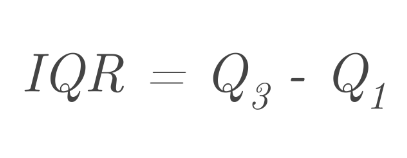Q1
***   \]
3. Define Outlier ***B:
    LLower*o Boun** Q1 - 1.5(IQR)\)
   - pper Bound:** QU Q3 + 1.5(IQR)
   - 
   - 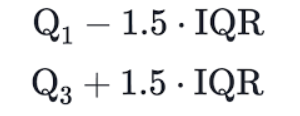ext{IQR} \)
4. Identify outliers as data points outside these bounds.

### Handling Outliers:
- **Capping**: Replace outliers with boundary values.
- **Removal**: Remove outliers from the dataset.

### Why IQR is Best Fit:
- **Skewed Data**: IQR effectively handles skewed distributions, making it robust against extreme values.
- **Continuous Features**: Suitable for continuous variables like Item_Weight and Item_Outlet_Sales, where outliers can skew predictions.
- **Non-Sensitivity**: Unlike Z-scores, IQR is less affected by extreme values, maintaining the dataset's integrity.
he dataset's integrity.
ing the dataset's integrity.


In [66]:
# Define a function to apply IQR outlier detection
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range

    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping the outliers
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply the IQR method to relevant columns
df_encoded = handle_outliers_iqr(df_encoded, 'remainder__Item_Weight')
df_encoded = handle_outliers_iqr(df_encoded, 'remainder__Item_Visibility')
df_encoded = handle_outliers_iqr(df_encoded, 'remainder__Item_MRP')
df_encoded = handle_outliers_iqr(df_encoded, 'remainder__Item_Outlet_Sales')


In [67]:
df_encoded.head()


,onehotencoder__Item_Identifier_DRA12,onehotencoder__Item_Identifier_DRA24,onehotencoder__Item_Identifier_DRA59,onehotencoder__Item_Identifier_DRB01,onehotencoder__Item_Identifier_DRB13,onehotencoder__Item_Identifier_DRB24,onehotencoder__Item_Identifier_DRB25,onehotencoder__Item_Identifier_DRB48,onehotencoder__Item_Identifier_DRC01,onehotencoder__Item_Identifier_DRC12,...,remainder__Item_MRP,remainder__Outlet_Establishment_Year,remainder__Item_Outlet_Sales,remainder__Outlet_Age,Weight_to_MRP_Ratio,Visibility_Rank,Outlet_Age_Category,Sales_to_Age_Ratio,Yearly_Sales_Trend,Item_Sales_Rank
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,249.8092,1999,3735.1380,25,0.037228,7856.0,Old,149.405520,2348.354635,1447.5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,48.2692,2009,443.4228,15,0.122645,7640.0,Middle-aged,29.561520,1995.498739,7420.5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,141.6180,1999,2097.2700,25,0.123572,7805.0,Old,83.890800,2348.354635,3674.5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,182.0950,1998,732.3800,26,0.105439,3788.5,Old,28.168462,339.351662,6655.5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,53.8614,1987,994.7052,37,0.165796,3788.5,Very Old,26.883924,2298.995256,6033.0


# 5. **Feature Scaling:**
   - Normalize or standardize the continuous feature space to ensure uniformity. Consider different scaling techniques like min-max scaling or z-normalization depending on the feature distribution.

### Z-score Normalization 

- This code normalizes specified continuous features in the dataset to ensure uniformity across different scales, which can improve model performance.

 ***Approach***
- **Z-score Normalization**: This method standardizes feature values based on their mean and standard deviation. 
  - **Formula**:
  -  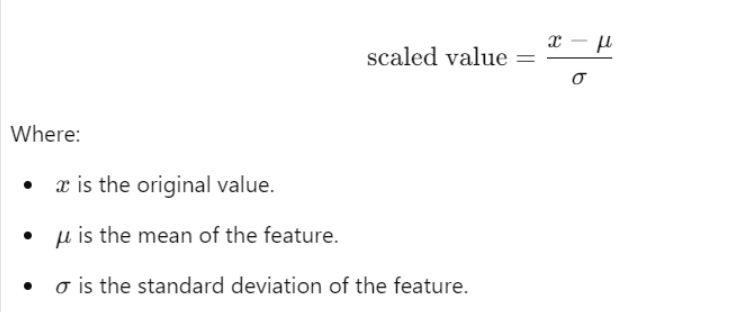
  - The result transforms the data to have a mean of 0 and a standard deviation of 1, which is beneficial for many machine learning algorithms.

#### Steps
1. **Calculate Mean and Standard Deviation**: For each feature column, compute the mean and standard deviation.
2. **Apply Z-score Normalization**: For each value in the selected columns, subtract the mean and divide by the standard deviation.
3. **Create Scaled Columns**: Store the normalized values in new columns prefixed with "scaled_".

#### Benefits
- **Uniformity**: Ensures that all features contribute equally to model training, especially when features are on different scales.
- **Robustness**: Helps algorithms that assume normally distributed data to perform better by reducing the influence of outliers.

#### Usage
This normalization technique is especially useful in algorithms like logistic regression, support vector machines, and neural networks, where the scale of input features can significantly affect model convergence and performance.


In [70]:
# Selecting continuous feature columns to be scaled
columns_to_scale = ['remainder__Item_Weight', 
                    'remainder__Item_Visibility', 
                    'remainder__Item_MRP', 
                    'remainder__Item_Outlet_Sales', 
                    'remainder__Outlet_Age']

# Apply Z-score normalization
for column in columns_to_scale:
    mean_value = df_encoded[column].mean()
    std_value = df_encoded[column].std()
    df_encoded['scaled_' + column] = (df_encoded[column] - mean_value) / std_value

# Output the scaled DataFrame
print("Data after Z-score Normalization:\n")
df_encoded.head()

# Save the modified DataFrame to a new CSV file (optional)
# df.to_csv('normalized_dataset.csv', index=False)


Data after Z-score Normalization:



,onehotencoder__Item_Identifier_DRA12,onehotencoder__Item_Identifier_DRA24,onehotencoder__Item_Identifier_DRA59,onehotencoder__Item_Identifier_DRB01,onehotencoder__Item_Identifier_DRB13,onehotencoder__Item_Identifier_DRB24,onehotencoder__Item_Identifier_DRB25,onehotencoder__Item_Identifier_DRB48,onehotencoder__Item_Identifier_DRC01,onehotencoder__Item_Identifier_DRC12,...,Visibility_Rank,Outlet_Age_Category,Sales_to_Age_Ratio,Yearly_Sales_Trend,Item_Sales_Rank,scaled_remainder__Item_Weight,scaled_remainder__Item_Visibility,scaled_remainder__Item_MRP,scaled_remainder__Item_Outlet_Sales,scaled_remainder__Outlet_Age
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7856.0,Old,149.405520,2348.354635,1447.5,-0.828359,-1.170199,1.747351,0.971666,-0.139533
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,7640.0,Middle-aged,29.561520,1995.498739,7420.5,-1.625269,-1.099096,-1.488936,-1.054175,-1.334024
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7805.0,Old,83.890800,2348.354635,3674.5,1.104972,-1.154513,0.010040,-0.036337,-0.139533
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3788.5,Old,28.168462,339.351662,6655.5,1.505785,-0.067981,0.660011,-0.876340,-0.020083
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3788.5,Very Old,26.883924,2298.995256,6033.0,-0.915595,-0.067981,-1.399138,-0.714896,1.293858


# 6. **Target Variable Transformation:**
   - Investigate the distribution of the dependent variable and apply necessary transformations to address skewness or kurtosis, facilitating better model convergence and performance.

## Target Variable Transformation 
o- n
ethe process of transforming the target variable, `scaled_remainder__Item_Outlet_Sales`, to improve model performance by addressing skewness and kurtosis. The transformation aims to facilitate better convergence during modeling.#

## Process Overview

1. **Distribution Investigation**:
   - A histogram with a kernel density estimate (KDE) visualizes the initial distribution of the sales data.
   - Skewness and kurtosis are calculated to assess the data's asymmetry and tail behavior.

2. **Data Cleaning**:
   - **NaN Handling**: Warnings are issued for any NaN values present in the dataset.
   - **Negative Values**: Sales values are clipped to zero to ensure valid inputs for transformations, particularly for logarithmic functions.

3. **Log Transformation**:
   - The log transformation, using `np.log1p`, is applied to normalize the data. This method is suitable for datasets containing zero values and helps stabilize variance.

4. **Post-Transformation Analysis**:
   - The transformed data's distribution is visualized to evaluate the effectiveness of the transformation.
   - Skewness and kurtosis are recalculated to confirm imp#roved normality.

## Conclusion
This transformation process enhances the quality of the target variable, supporting more effective modeling techniques and leading to better predictive performance.


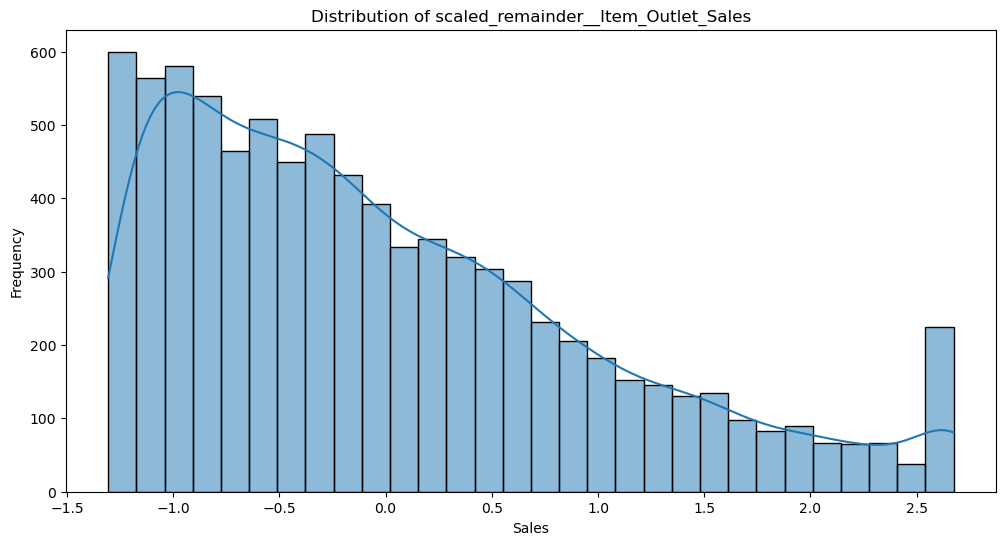

Skewness: 0.874605719287434, Kurtosis: 0.0700347471838052


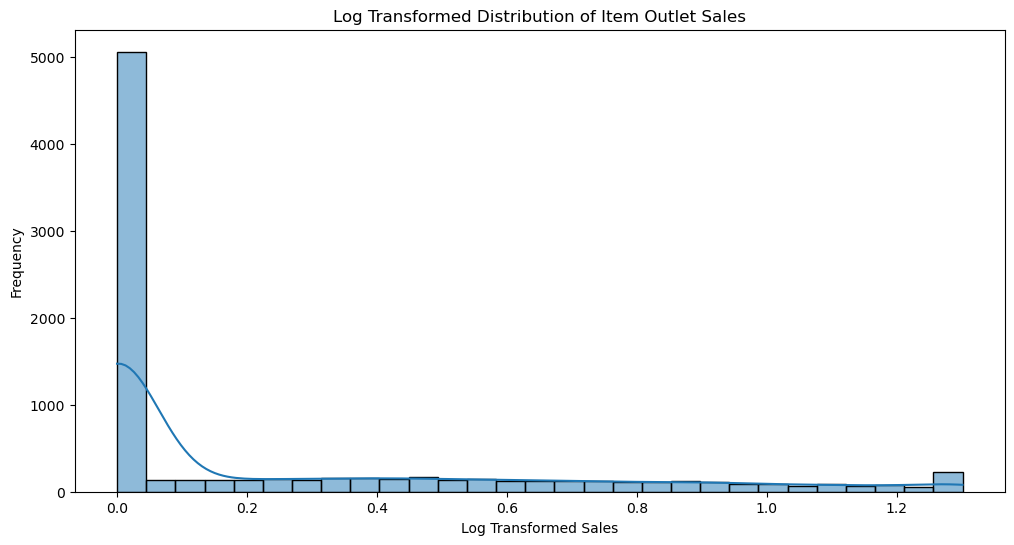

Transformed Skewness: 1.3448997683602122, Transformed Kurtosis: 0.53273538068547


In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Investigate the distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_encoded['scaled_remainder__Item_Outlet_Sales'], kde=True)
plt.title('Distribution of scaled_remainder__Item_Outlet_Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Calculate skewness and kurtosis
skewness = df_encoded['scaled_remainder__Item_Outlet_Sales'].skew()
kurtosis = df_encoded['scaled_remainder__Item_Outlet_Sales'].kurtosis()
print(f'Skewness: {skewness}, Kurtosis: {kurtosis}')

# Check for negative values and NaNs
if df_encoded['scaled_remainder__Item_Outlet_Sales'].isnull().any():
    print("Warning: There are NaN values in 'scaled_remainder__Item_Outlet_Sales'.")

# Replace negative values with zero or a small positive value
df_encoded['scaled_remainder__Item_Outlet_Sales'] = df_encoded['scaled_remainder__Item_Outlet_Sales'].clip(lower=0)

# Step 2: Apply necessary transformations
# Log transformation (if data is strictly positive)
df_encoded['log_transformed_sales'] = np.log1p(df_encoded['scaled_remainder__Item_Outlet_Sales'])  # log(1 + x)

# Verify the transformation
plt.figure(figsize=(12, 6))
sns.histplot(df_encoded['log_transformed_sales'], kde=True)
plt.title('Log Transformed Distribution of Item Outlet Sales')
plt.xlabel('Log Transformed Sales')
plt.ylabel('Frequency')
plt.show()

# Recalculate skewness and kurtosis for the transformed variable
transformed_skewness = df_encoded['log_transformed_sales'].skew()
transformed_kurtosis = df_encoded['log_transformed_sales'].kurtosis()
print(f'Transformed Skewness: {transformed_skewness}, Transformed Kurtosis: {transformed_kurtosis}')
